In [9]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load data

df = pd.read_csv("AN19_individual_EPI.csv")

In [11]:
df

,Document Name,Sequence Name,SITE,TreatmentDay,Pooled,Year,Coverage,Variant Frequency,Variant Raw Frequency,TrackerSNP,TYPE,SNP
0,19ANBe00A0009PfFxxx0_S1_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,11,100.0%,11,S108N,mutation,108N
1,19ANBe00A0010PfFxxx0_S2_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,8,100.0%,8,S108N,mutation,108N
2,19ANBe00A0016PfFxxx0_S3_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,26,100.0%,26,S108N,mutation,108N
3,19ANBe00A0017PfFxxx0_S4_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,10,100.0%,10,S108N,mutation,108N
4,19ANBe00A0020PfFxxx0_S5_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,26,100.0%,26,S108N,mutation,108N
...,...,...,...,...,...,...,...,...,...,...,...,...
5162,19ANZa00A0208PfFxxx0_S15_L001_R_001 (trimmed) K13,K13,Zaire,0,individual,19,100.5,NaN,NaN,I543T,wildtype,I543
5163,19ANBe28A0031PfFxxx0_S39_L001_R_001 (trimmed) K13,K13,Benguela,28,individual,19,101.0,NaN,NaN,C469F,wildtype,C469
5164,19ANBe28A0031PfFxxx0_S39_L001_R_001 (trimmed) K13,K13,Benguela,28,individual,19,101.0,NaN,NaN,C469Y,wildtype,C469
5165,19ANZa00A0274PfFxxx0_S26_L001_R_001 (trimmed) K13,K13,Zaire,0,individual,19,101.0,NaN,NaN,R515K,wildtype,R515


In [12]:
df = df.infer_objects()

In [13]:
df.dtypes

Document Name            object
Sequence Name            object
SITE                     object
TreatmentDay             object
Pooled                   object
Year                      int64
Coverage                 object
Variant Frequency        object
Variant Raw Frequency    object
TrackerSNP               object
TYPE                     object
SNP                      object
dtype: object

In [14]:
# Sort df by gene 

newlist=[]
for item in df['TrackerSNP'].tolist():
    #print(item[1:-1])
    newlist+=[int(item[1:-1])]
    
df['AAPOS'] = newlist

dict1={}
for item in df['TrackerSNP'].tolist():
    dict1[int(item[1:-1])]=item

#df['New_G']
#print(newlist)

#df.sort_values(by=['GENE','AAPOS'], ascending = (True, False))
#newlist2=[]

#df['AAPOS'].tolist()

#list1=df['AAPOS'].tolist()
list1=[]
for item in df['AAPOS'].tolist():
    list1+=[item]
list1.sort()
#print(list1)
newlist2=[]
for item in list1:
    #print(item[1:-1])
    newlist2+=[dict1[item]]
#newlist2    
#print(len(newlist2))
df['New_G']=newlist2
#print(newlist2)
#df.sort_values(['GENE','AAPOS'],ascending=False).groupby('GENE').head(3)


In [15]:
# Set style 
sns.set_style("whitegrid")

# Set plot/figure size 
sns.set(rc = {'figure.figsize':(20,14)})

#Create custom palette based on categorical data 
my_pal = {"Fail":"#ef9300", "Pass":"#32b67a"}

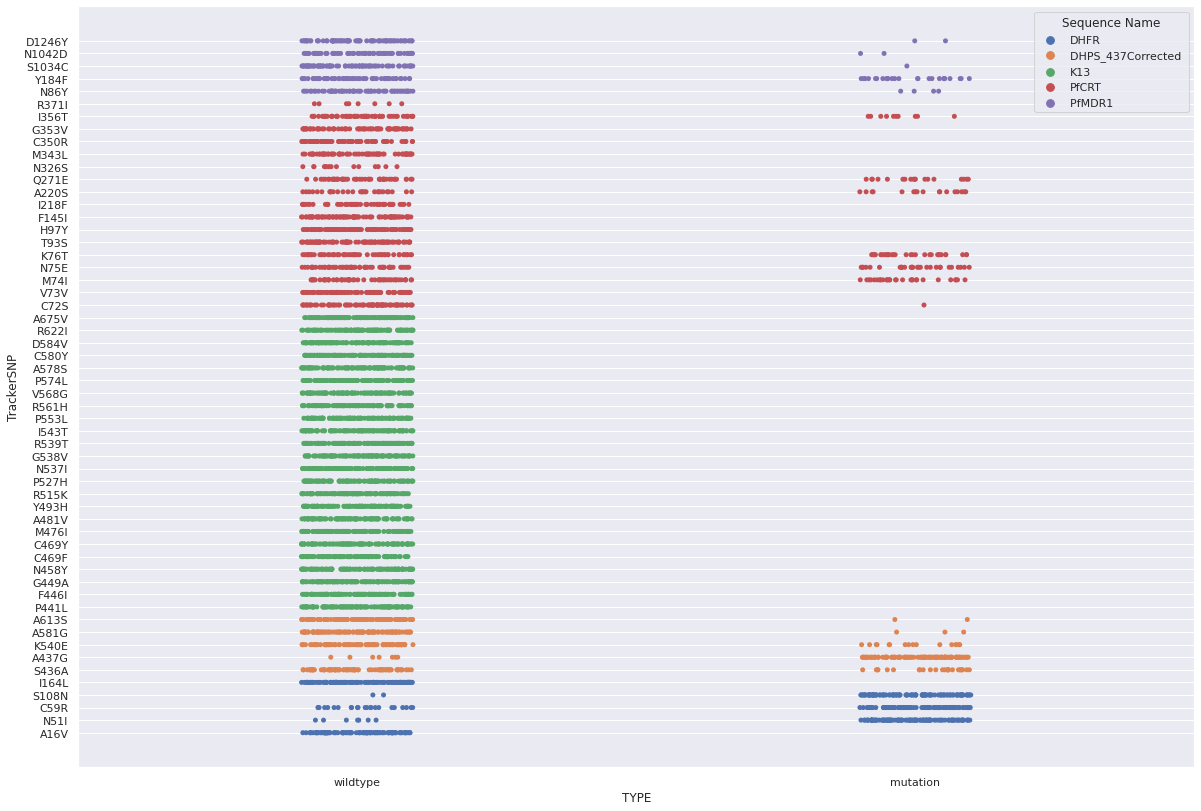

In [16]:
# Draw plots and sort by Gene
g= sns.stripplot(x="TYPE", y="TrackerSNP", hue="Sequence Name", data=df.sort_values(['Sequence Name','AAPOS'],ascending=(True,True)))

#g= sns.stripplot(x="TYPE", y="G_annotation", hue="GENE", data=df)

In [17]:
# Save figure and specify 
plt.savefig('ind_seq_results.pdf')
            
# plt.savefig('Figure_1.png', dpi=600, bbox_inches='tight')

# Display figure
plt.show()

<Figure size 1440x1008 with 0 Axes>

In [18]:
df.head()


,Document Name,Sequence Name,SITE,TreatmentDay,Pooled,Year,Coverage,Variant Frequency,Variant Raw Frequency,TrackerSNP,TYPE,SNP,AAPOS,New_G
0,19ANBe00A0009PfFxxx0_S1_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,11,100.0%,11,S108N,mutation,108N,108,A16V
1,19ANBe00A0010PfFxxx0_S2_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,8,100.0%,8,S108N,mutation,108N,108,A16V
2,19ANBe00A0016PfFxxx0_S3_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,26,100.0%,26,S108N,mutation,108N,108,A16V
3,19ANBe00A0017PfFxxx0_S4_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,10,100.0%,10,S108N,mutation,108N,108,A16V
4,19ANBe00A0020PfFxxx0_S5_L001_R_001 (trimmed) DHFR,DHFR,Benguela,0,individual,19,26,100.0%,26,S108N,mutation,108N,108,A16V
